# Prevendo a Ocorrência de Crises Epiléticas

---

### Informações
Este projeto tem como objetivo principal desenvolver um modelo de aprendizado de máquina para prever a ocorrência de crises epiléticas.

O arquivo está organizado conforme etapas de um projeto de ciência de dados e desenvolvimento de modelos de aprendizado de máquina.

O projeto tem como base o estudo de caso do curso Formação Inteligência Artificial Aplicada a Medicia da Data Science Academy.

### Dados
O banco de dados é oriundo do repositório da UCI:
https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

# Carregar pacotes

In [145]:
# Info do sistema
import os

# Manipular dados e computação científica
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Salvar arquivos
import pickle

# métricas para avaliação dos modelos
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "whitegrid")

# não mostrar avisos
import warnings
warnings.filterwarnings('ignore')

# ------------------------------ Etapa 1 ------------------------------ 

### Informações sobre o problema
Cerca de 1 em cada 26 pessoas desenvolverá epilepsia em algum momento da vida. Existem muitos tipos de convulsões, cada uma com sintomas diferentes, como perda de consciência, movimentos bruscos ou confusão. 


Algumas convulsões são muito mais difíceis de detectar visualmente, os pacientes geralmente apresentam sintomas como não responder ou olhar sem expressão por um breve período de tempo. As convulsões podem ocorrer inesperadamente e podem resultar em lesões como queda, mordedura da língua ou perda do controle da urina ou fezes. Portanto, essas são algumas das razões pelas quais a detecção de convulsões é de extrema importância para pacientes sob supervisão médica que se suspeitem estar propensos a convulsões.


### Objetivo
Prever se um paciente está tendo uma convulsão ou não através de 178 leituras de EEG (Eletroencefalograma) por segundo.


### Métodos
Métodos de classificação binária para prever se um indivíduo está tendo uma convulsão em algum momento.


#### Métrica
AUC Score (Area Under The Curve Score), cujo valor vai de 1 a 100% e para esse problema o valor da métrica deve ser aproximadamente de 99%, uma vez que a previsão do modelo está relacionada a casos de vida ou morte.

# ------------------------------ Etapa 2 ------------------------------ 
## Compreensão dos dados

### Análise exploratória

In [136]:
# Definir diretório dos dados
#print(os.getcwd())

In [15]:
path = '..\_dados\PrevendoOcorrenciaDeCrisesEpileticas'
os.chdir(path)

In [17]:
# Carregar dados
df = pd.read_csv('dados_originais.csv')

In [28]:
# Visualizar informações básicas
print("Dimensões do dataset \n", 
      "Número de observações (linhas):", 
      df.shape[0], 
      "\n Número de variáveis (colunas): ",
      df.shape[1])
df.head()

Dimensões do dataset 
 Número de observações (linhas): 11500 
 Número de variáveis (colunas):  180


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### Criar nova variável para análise
Criar nova variável 'TARGET' onde 1 é quando um paciente está tendo uma convulsão e 0 quando não está tendo uma convulsão

In [29]:
# Definir True quando valor for igual a 1 e False quando for diferente
df['TARGET'] = df.y == 1

In [32]:
# Transformar em valor número - melhor para construção de modelos
# 0 = false | 1 = true
df['TARGET'] = df['TARGET'].astype(int)

In [33]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,TARGET
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,0


In [36]:
# deletar coluna y
df.pop('y')

In [35]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [38]:
# Coluna 1 não é importante para o modelo
df.drop(df.columns[0], axis=1, inplace=True)

In [39]:
print("Número de variáveis: ", len(df.columns))

Número de variáveis:  179


### Info
O conjunto de dados tem apenas um recurso exclusivo, e essas são as leituras de EEG. As colunas são divididas para capturar a leitura do EEG em um ponto no tempo e todos os pontos no tempo (todas as 178 colunas) existem no mesmo segundo. 

### Calcular frequência da classe positiva na variável target
 A taxa é calculada por: número de amostras positivas / número de amostras. Nesse cenário específico, significa que as pessoas que têm uma convulsão são positivas, enquanto as que não sofrem são negativas.

In [53]:
# classe positiva: target = 1
def calc_freq(y_atual):
    freq = sum(y_atual/ len(y_atual))
    
    return freq

print("Frequência da classe positiva: %.3f"%
     calc_freq(df['TARGET'].values))

Frequência da classe positiva: 0.200


uma taxa  de 0,2 significa que 20% de nossa amostra está tendo uma convulsão naquele momento.

# ------------------------------ Etapa 3 ------------------------------ 
## Preparação dos dados

In [58]:
# Selecionar colunas de interesse
col_list = df.columns.tolist()
col_input = col_list[0:178]
df = df[col_input + ["TARGET"]]

In [59]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


O conjunto de dados possue 178 recursos, leituras de EEG, mais a variável target, com ou sem epilepsia

In [62]:
# Verificar dados duplicados nos dados de entrada
dup_cols = set([x for x in col_input if col_input.count(x) > 1])
assert len(dup_cols) == 0, "colunas duplicadas nos dados de entrada!"

# Verificar dados duplicados no dataset final
cols_df_data = list(df)
dup_cols_df = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
assert len(dup_cols_df) == 0, "colunas duplicadas no dataset final!"

# ------------------------------ Etapa 4 ------------------------------ 
## Construção do Modelo

### Dividir dados em dados de treino, validação e teste

In [65]:
# Gerar amostras aleatórias
df = df.sample(n = len(df))

# Ajustar índices
df = df.reset_index(drop=True)

In [67]:
# Gerar índice para divisão dos dados
df_valid_teste = df.sample(frac=0.3)

In [68]:
# Divisão dos dados

# Teste
df_teste = df_valid_teste.sample(frac=0.5)

# Validação
df_valid = df_valid_teste.drop(df_teste.index)

# Treino
df_treino = df.drop(df_valid_teste.index)

In [70]:
# Verificar a freq de cada subconjunto
print(
    "Teste(n = %d): %.3f"
    % (len(df_teste), calc_freq(df_teste.TARGET.values))
)
print(
    "Validação(n = %d): %.3f"
    % (len(df_valid), calc_freq(df_valid.TARGET.values))
)
print(
    "Treino(n = %d): %.3f"
    % (len(df_treino), calc_freq(df_treino.TARGET.values))
)

Teste(n = 1725): 0.187
Validação(n = 1725): 0.223
Treino(n = 8050): 0.198


### Balancear conjunto de dados

In [78]:
# criar índice
rows_pos = df_treino.TARGET == 1

# definir valores positivos e negativos do índice
df_treino_pos = df_treino.loc[rows_pos]
df_treino_neg = df_treino.loc[~rows_pos]

# Definir valor mínimo
n = np.min([len(df_treino_pos), len(df_treino_neg)])

# Obter valores aleatórios para dataset de treino
df_treino_final = pd.concat([df_treino_pos.sample(n=n, random_state=11),
                            df_treino_neg.sample(n=n, random_state=11)],
                           axis=0,
                           ignore_index=True)

df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state=11).reset_index(drop=True)

print("Freq antes de balancear: %.3f" %calc_freq(df_treino.TARGET.values))
print("Freq depois de balancear: %.3f" %calc_freq(df_treino_final.TARGET.values))

Freq antes de balancear: 0.198
Freq depois de balancear: 0.500


In [141]:
# Dividir dados preditores e target

# X
X_treino = df_treino_final[col_input].values
X_valid = df_valid[col_input].values
X_teste = df_teste[col_input].values

# Y
Y_treino = df_treino_final['TARGET'].values
Y_valid = df_valid['TARGET'].values
Y_teste = df_teste['TARGET'].values

In [83]:
print("Dim dados treino: ", X_treino.shape, Y_treino.shape)
print("Dim dados validação: ", X_valid.shape, Y_valid.shape)

Dim dados treino:  (3186, 178) (3186,)
Dim dados validação:  (1725, 178) (1725,)


### Normalizar os dados

In [142]:
scaler = StandardScaler()

scaler.fit(X_treino)

# Aplicar a normalização
X_treino_norm = scaler.transform(X_treino)
X_valid_norm = scaler.transform(X_valid)
X_teste_norm = scaler.transform(X_teste)

In [86]:
X_treino_norm

array([[-0.09866001, -0.54559718, -0.98275467, ..., -1.39379443,
        -1.22947211, -1.05920211],
       [ 1.20169153,  1.17942741,  1.31025715, ..., -0.02431516,
        -0.65813158, -1.21200366],
       [ 1.3425965 ,  0.93760153,  0.71957075, ...,  0.02503544,
        -0.06593921, -0.21672874],
       ...,
       [ 0.10665865,  0.05090665, -0.02288925, ..., -0.02842771,
        -0.04925774, -0.02262949],
       [ 0.54547698,  0.51440625,  0.51036931, ...,  0.18953745,
         0.25517919,  0.29536291],
       [-0.15099614, -0.12643233, -0.12543898, ...,  0.00858524,
         0.00495706, -0.02262949]])

### Construção do Modelo

In [112]:
# Funções auxiliares para calcular métricas de avaliação do modelo

# Calcular a especifidade
def calc_specificity(y_atual, y_pred, thresh):
    
    specificity = sum((y_pred < thresh) & (y_atual == 0 ))/ sum(y_atual == 0)
    
    return specificity


# Gerar relatório de métricas
def print_report(y_atual, y_pred, thresh):
    
    auc = roc_auc_score(y_atual, y_pred)
    accuracy = accuracy_score(y_atual, (y_pred > thresh))
    recall = recall_score(y_atual, (y_pred > thresh))
    precision = precision_score(y_atual, (y_pred > thresh))
    specificity = calc_specificity(y_atual, y_pred, thresh)
    
    print('AUC: %.3f' %auc)
    print('Acurácia: %.3f' %accuracy)
    print('Recall: %.3f' %recall)
    print('Precisão: %.3f' %precision)
    print('Especificidade: %.3f' %specificity)
    
    return auc, accuracy, recall, precision, specificity

In [113]:
# Os dados de treinamento foram balanceados, dessa forma o thresh será definido no limite de 0,5 para rotular uma amostra prevista como positiva
thresh = 0.5

### Modelo 1 - Regressão Logística

In [122]:
lr = LogisticRegression(random_state=123)

# Treinar e criar modelo
model_v1 = lr.fit(X_treino_norm, Y_treino)

# Prever
y_treino_pred = lr.predict_proba(X_treino_norm)[:,1]
y_valid_pred = lr.predict_proba(X_valid_norm)[:,1]

lr_report_treino = []
lr_report_valid = []

print('----- Regressão Logística -----')
print('Treinamento')
lr_report_treino = print_report(Y_treino, y_treino_pred, thresh)
print('\nValidação')
lr_report_valid = print_report(Y_valid, y_valid_pred, thresh)

----- Regressão Logística -----
Treinamento
AUC: 0.625
Acurácia: 0.674
Recall: 0.524
Precisão: 0.748
Especificidade: 0.823

Validação
AUC: 0.525
Acurácia: 0.725
Recall: 0.422
Precisão: 0.391
Especificidade: 0.812


### Modelo 2 - Naive Bayes

In [123]:
nb = GaussianNB()

# Treinar e criar o modelo
model_v2 = nb.fit(X_treino_norm, Y_treino)

# Prever
y_treino_pred = nb.predict_proba(X_treino_norm)[:,1]
y_valid_pred = nb.predict_proba(X_valid_norm)[:,1]

nb_report_treino = []
nb_report_valid = []

print('----- Naive Bayes -----')
print('Treinamento')
nb_report_treino = print_report(Y_treino, y_treino_pred, thresh)
print('\nValidação')
nb_report_valid = print_report(Y_valid, y_valid_pred, thresh)

----- Naive Bayes -----
Treinamento
AUC: 0.985
Acurácia: 0.935
Recall: 0.894
Precisão: 0.975
Especificidade: 0.977

Validação
AUC: 0.988
Acurácia: 0.956
Recall: 0.880
Precisão: 0.918
Especificidade: 0.978


### Modelo 3 - XGBoost

In [124]:
xgbc = XGBClassifier()

# Treinar e criar o modelo
model_v3 = xgbc.fit(X_treino_norm, Y_treino)

# Prever
y_treino_pred = xgbc.predict_proba(X_treino_norm)[:,1]
y_valid_pred = xgbc.predict_proba(X_valid_norm)[:,1]

xgbc_report_treino = []
xgbc_report_valid = []

print('----- Xtreme Gradient Boosting Classifier -----')
print('Treinamento')
xgbc_report_treino = print_report(Y_treino, y_treino_pred, thresh)
print('\nValidação')
xgbc_report_valid = print_report(Y_valid, y_valid_pred, thresh)

----- Xtreme Gradient Boosting Classifier -----
Treinamento
AUC: 0.999
Acurácia: 0.988
Recall: 0.986
Precisão: 0.990
Especificidade: 0.990

Validação
AUC: 0.991
Acurácia: 0.958
Recall: 0.914
Precisão: 0.898
Especificidade: 0.970


# ------------------------------ Etapa 5 ------------------------------ 
## Avaliação e Interpretação

In [125]:
df_results = pd.DataFrame({
    'classificador':['RL','RL','NB','NB','XGB','XGB'],
    'data_set':['treino','validação']*3,
    'auc': [lr_report_treino[0], lr_report_valid[0], nb_report_treino[0], nb_report_valid[0], xgbc_report_treino[0], xgbc_report_valid[0]],
    'accuracy': [lr_report_treino[1], lr_report_valid[1], nb_report_treino[1], nb_report_valid[1], xgbc_report_treino[1], xgbc_report_valid[1]],
    'recall': [lr_report_treino[2], lr_report_valid[2], nb_report_treino[2], nb_report_valid[2], xgbc_report_treino[2], xgbc_report_valid[2]],
    'precision': [lr_report_treino[3], lr_report_valid[3], nb_report_treino[3], nb_report_valid[3], xgbc_report_treino[3], xgbc_report_valid[3]],
    'specificity': [lr_report_treino[4], lr_report_valid[4], nb_report_treino[4], nb_report_valid[4], xgbc_report_treino[4], xgbc_report_valid[4]],
})

### Comparar métrica AUC

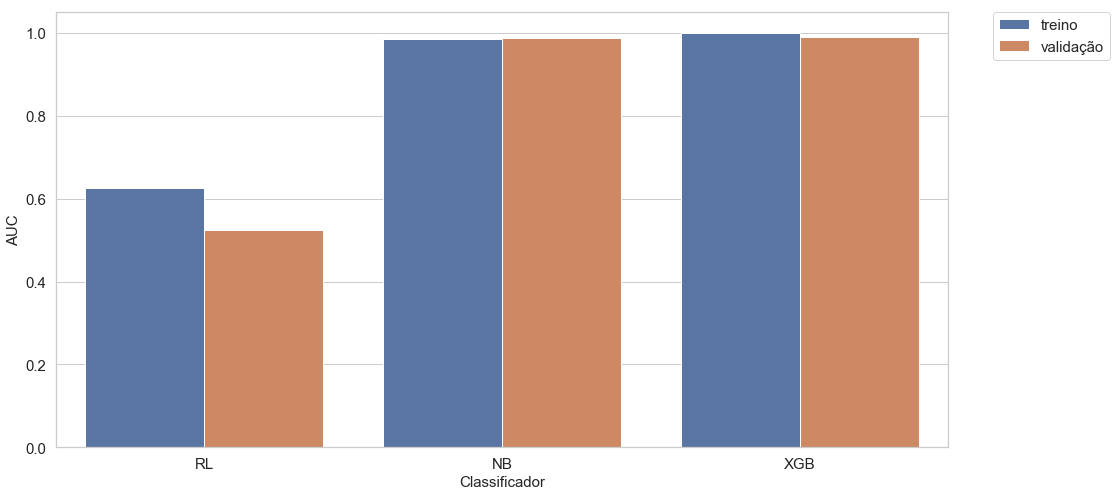

In [127]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x='classificador',y='auc',hue='data_set',data=df_results)
ax.set_xlabel('Classificador', fontsize=15)
ax.set_ylabel('AUC', fontsize=15)
ax.tick_params(labelsize=15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

### Salvar melhor modelo

In [152]:
#os.getcwd()

In [131]:
path = '..\..\PrevendoOcorrenciaDeCrisesEpileticas\modelos'
os.chdir(path)

In [134]:
# De acordo com a AUC Score, o melhor modelo é o v3
pickle.dump(model_v3, open('best_model.pkl','wb'), protocol=4)

### Avaliar modelo

In [139]:
# Carregar modelo
best_model = pickle.load(open('best_model.pkl','rb'))

In [143]:
# Calcular probabilidades de previsão
y_treino_pred = best_model.predict_proba(X_treino_norm)[:,1]
y_valid_pred = best_model.predict_proba(X_valid_norm)[:,1]
y_teste_pred = best_model.predict_proba(X_teste_norm)[:,1]

In [144]:
# Desempenho
thresh = 0.5

print('\nTreinamento:')
report_treino = []
report_treino = print_report(Y_treino, y_treino_pred, thresh)

print('\nValidação:')
report_valid = []
report_valid = print_report(Y_valid, y_valid_pred, thresh)

print('\nTeste:')
report_teste = []
report_teste = print_report(Y_teste, y_teste_pred, thresh)


Treinamento:
AUC: 0.999
Acurácia: 0.988
Recall: 0.986
Precisão: 0.990
Especificidade: 0.990

Validação:
AUC: 0.991
Acurácia: 0.958
Recall: 0.914
Precisão: 0.898
Especificidade: 0.970

Teste:
AUC: 0.992
Acurácia: 0.957
Recall: 0.926
Precisão: 0.854
Especificidade: 0.964


### Curva ROC

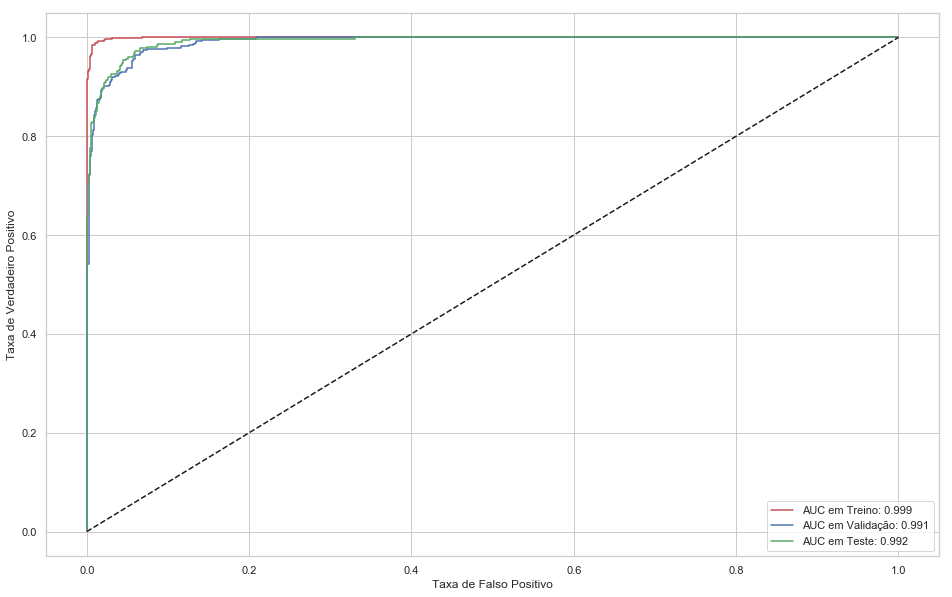

In [146]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(Y_treino, y_treino_pred)
auc_train = roc_auc_score(Y_treino, y_treino_pred)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(Y_valid, y_valid_pred)
auc_valid = roc_auc_score(Y_valid, y_valid_pred)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(Y_teste, y_teste_pred)
auc_test = roc_auc_score(Y_teste, y_teste_pred)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-',label ='AUC em Treino: %.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='AUC em Validação: %.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='AUC em Teste: %.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()

# ------------------------------ Etapa 6 ------------------------------ 
## Deploy 

In [155]:
path = '..\..\_dados\PrevendoOcorrenciaDeCrisesEpileticas'
os.chdir(path)

In [157]:
# Carregando dados de um novo paciente
novo_paciente = pd.read_csv('novo_paciente.csv')

In [158]:
novo_paciente.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,...,-41,-16,2,22,33,45,56,67,69,63


In [159]:
novo_paciente_norm = scaler.transform(novo_paciente)

In [162]:
novo_paciente_norm

array([[ 0.25964119,  0.21615433,  0.17400622,  0.11056945,  0.0668677 ,
         0.05271345,  0.0220026 ,  0.01620892,  0.005005  , -0.01930095,
        -0.06170496, -0.09382831, -0.1063611 , -0.10294887, -0.08421772,
        -0.07290323, -0.06955981, -0.06884547, -0.0420909 , -0.02402874,
        -0.03450456, -0.01116784,  0.01218608,  0.01945409,  0.00999585,
         0.01000434,  0.03731302,  0.06271492,  0.0885744 ,  0.08004195,
         0.05834662,  0.00146571, -0.018596  , -0.03632095, -0.01050467,
         0.0211173 ,  0.06591001,  0.11037185,  0.13074897,  0.16670088,
         0.17748528,  0.19118928,  0.17732919,  0.19335926,  0.19184929,
         0.19511662,  0.19430279,  0.15979418,  0.10016803,  0.05165006,
         0.03160019, -0.02804559, -0.08567789, -0.13362157, -0.1654689 ,
        -0.18764147, -0.1896208 , -0.18308448, -0.17173215, -0.13446873,
        -0.0984026 , -0.05878551, -0.02300623, -0.04012898, -0.03087935,
        -0.02404892, -0.00676045,  0.04400829,  0.0

### Prever condição do novo paciente

In [164]:
result_proba = best_model.predict_proba(novo_paciente_norm)
result_predict = best_model.predict(novo_paciente_norm)

In [179]:
print("O paciente tem %.3f chances de não ter crise epilética e %.3f chances de ter crise epilética" %(result_proba[0][0],result_proba[0][1]))
print('O modelo classificou o paciente na classe %.f, dessa forma o paciente não terá uma crise epilética' %result_predict[0])

O paciente tem 0.985 chances de não ter crise epilética e 0.015 chances de ter crise epilética
O modelo classificou o paciente na classe 0, dessa forma o paciente não terá uma crise epilética
